In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
folder_path = "/xiongjun/test/MIL/new_saved/topk_data/40_128_4mer_0.9_RA_[0.7-0.2-0.1]"
filepaths = ["train.csv", "test.csv", "val.csv"]
# 使用列表推导式来读取所有的文件
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in filepaths]

In [3]:
# 使用pd.concat函数来合并所有的数据框
df = pd.concat(df_list, ignore_index=True)

In [4]:
labelname = ['breast', 'prostate', 'lung', 'liver', 'pancreas', 'colorectal', 'health']

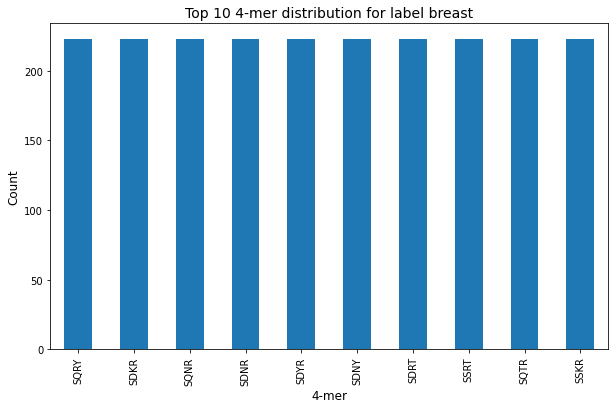

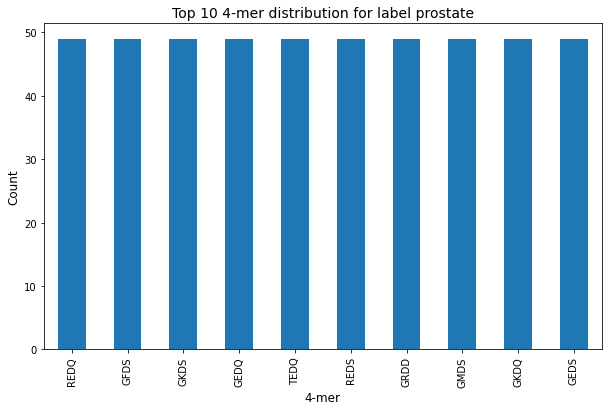

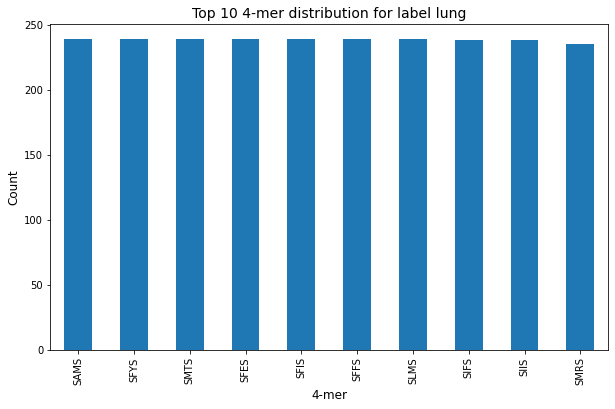

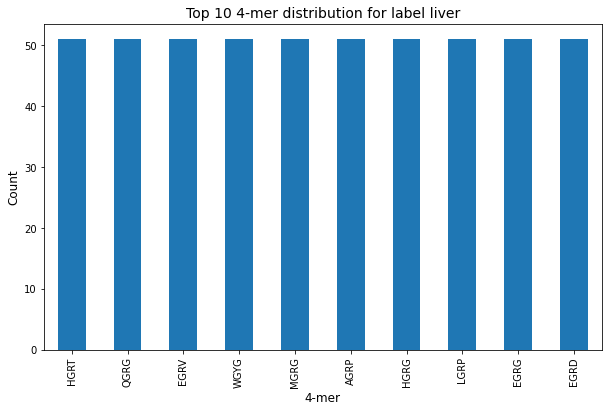

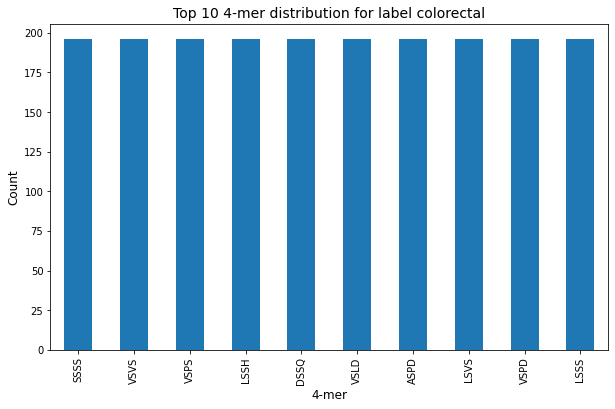

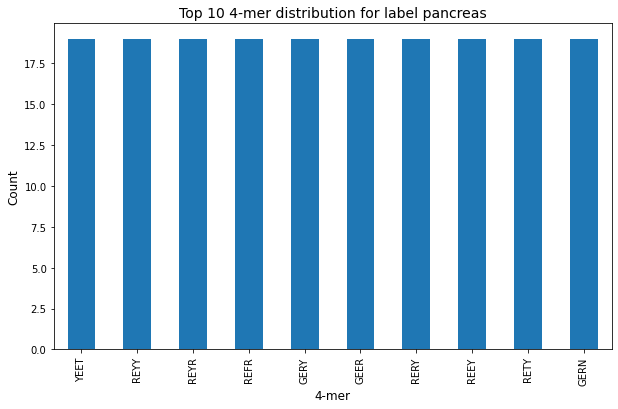

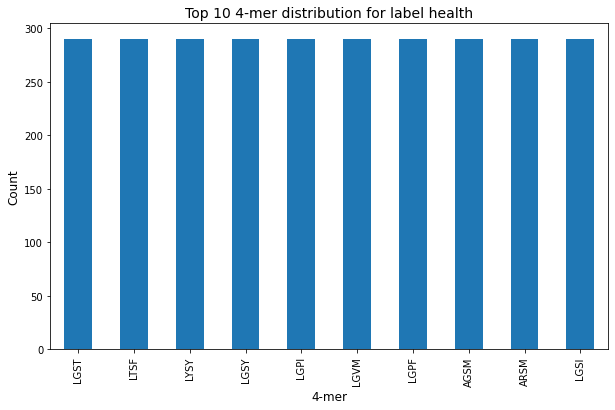

In [5]:
# 获取label的唯一值
labels = df['label'].unique()
m = 10
# 对于每个唯一的label值
for label in labels:
    # 过滤dataframe以获取与该label相关的行
    df_label = df[df['label'] == label]
    
    # 计算4-mer列的值分布，并取前m个最常见的值
    distribution = df_label['4-mer'].value_counts().nlargest(m)
    
    # 创建一个新的图形
    plt.figure(figsize=(10, 6))
    
    # 绘制4-mer的分布
    distribution.plot(kind='bar')
    
    # 设置图形的标题和轴标签
    plt.title(f'Top {m} 4-mer distribution for label {labelname[label]}', fontsize=14)
    plt.xlabel('4-mer', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # 显示图形
    plt.show()